<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data School</h1><h2>Data Exploration</h2><h3>Data Cleansing I</h3></th>
        <th style="text-align:center; width:25%">
        <div class="alert alert-block alert-info", style='background:black' ><img src='https://dataschool.sg/static/media/data-school.66a3470f.png' style="width: 250px; height: 125px; "></div></th>
    </tr>
</table>





<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><div class="alert alert-block alert-info", style='background:gray' ><img src='https://www.sginnovate.com/sites/default/files/brand-logo.png' style="width: 250px; height: 125px; "></div></th>
        <th style="text-align:center;"><h1></h1><h2>With our esteemed partners</h2><h3></h3></th>
        <th style="text-align:center; width:25%"><img src='http://1.bp.blogspot.com/_yhJCyboCJYc/THClIailuLI/AAAAAAAAAws/468ePgviUso/S250/Developer+Learning+Solutions.png' style="width: 250px; height: 125px; "></th>
    </tr>
</table>

# Data Cleansing I

### Objectives
After completing this practical exercise, students should be able to:
1. [Import data from a CSV file into a Pandas DataFrame](#Import)
2. [Rename column values](#Rename)
3. [Manipulate column variable values](#Manipulate)

<span style='background:yellow'>
There are three aspects of data cleansing processes notwithstanding to this three aspects: <br>
1. Incorrect Values <br>
2. Outliers <br>
3. Missing Values <br>
</span>

##### Import Libraries

In [26]:
import numpy as np
import pandas as pd

##### Import data from CSV File from data sub folder accordingly

The datasets contains the Amazon Fires Comma Separated Values (CSV) files which needs to be read by the pandas read_csv() function.

In [27]:
df = pd.read_csv("datasets/amazon_fires.csv")

Print the first 5 rows using the pandas head() function.

In [28]:
df.head()

Unnamed: 0   ano      mes estado   numero  encontro
0           0  1998  Janeiro   Acre  0 Fires  1/1/1998
1           1  1999  Janeiro   Acre  0 Fires  1/1/1999
2           2  2000  Janeiro   Acre  0 Fires  1/1/2000
3           3  2001  Janeiro   Acre  0 Fires  1/1/2001
4           4  2002  Janeiro   Acre  0 Fires  1/1/2002

In [29]:
# Realise that the df has characters that are not of the English Language and requires some data cleansing process
# The first column is a repeat of the index and can be dropped or use read_csv() with first column as index values
df = pd.read_csv("datasets/amazon_fires.csv", index_col=0)
df.head()

ano      mes estado   numero  encontro
0  1998  Janeiro   Acre  0 Fires  1/1/1998
1  1999  Janeiro   Acre  0 Fires  1/1/1999
2  2000  Janeiro   Acre  0 Fires  1/1/2000
3  2001  Janeiro   Acre  0 Fires  1/1/2001
4  2002  Janeiro   Acre  0 Fires  1/1/2002

##### Renaming columns

In [30]:
new_columns = {'ano' : 'year',
               'estado': 'state',
               'mes': 'month',
               'numero': 'number_of_fires',
               'encontro': 'date'}

df.rename(columns = new_columns, inplace=True)

In [31]:
df.head()

year    month state number_of_fires      date
0  1998  Janeiro  Acre         0 Fires  1/1/1998
1  1999  Janeiro  Acre         0 Fires  1/1/1999
2  2000  Janeiro  Acre         0 Fires  1/1/2000
3  2001  Janeiro  Acre         0 Fires  1/1/2001
4  2002  Janeiro  Acre         0 Fires  1/1/2002

This would be a good juncture to understand the difference between measurement and categorical variables.

![alt text](https://thefactfactor.com/wp-content/uploads/2019/06/Variables.png)

### Incorrect Values

The use of frequency counts will assist in identifying the errors.

The unique values of each columns also retrieve a set of variable values.

##### The column unique values

In [32]:
# It is important to know the data composition of each column
# There are five columns here but projects there might be more columns and is important to analyse them individually
for col in df:
    print("*******************************************************************************")
    print(col)
    print(df[col].unique())
    print("*******************************************************************************")

*******************************************************************************
year
[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]
*******************************************************************************
*******************************************************************************
month
['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']
*******************************************************************************
*******************************************************************************
state
['Acre' 'alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'pará'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']
*******************************************************************************
****************************

In [33]:
# The value_counts() function will provide a frequency table for each unique variable values
df["state"].value_counts()

Rio                 717
Paraiba             478
Mato Grosso         478
alagoas             240
Tocantins           239
Santa Catarina      239
Roraima             239
Amazonas            239
Sergipe             239
Amapa               239
Ceara               239
pará                239
Goias               239
rondonia            239
Minas Gerais        239
Sao Paulo           239
Espirito Santo      239
Maranhao            239
Distrito Federal    239
Pernambuco          239
Piau                239
Acre                239
Bahia               239
Name: state, dtype: int64

In [34]:
# It is important to understand the datatype in each of the columns for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             6454 non-null   int64 
 1   month            6454 non-null   object
 2   state            6454 non-null   object
 3   number_of_fires  6322 non-null   object
 4   date             6454 non-null   object
dtypes: int64(1), object(4)
memory usage: 302.5+ KB


In [35]:
# The only columnn that is an integer value is the year column and the rest are object or otherwise string datatype format
# Rearrange the columns for ease of reference
new_order = [4,1,0,2,3,]
df = df[df.columns[new_order]]
df.head()

date    month  year state number_of_fires
0  1/1/1998  Janeiro  1998  Acre         0 Fires
1  1/1/1999  Janeiro  1999  Acre         0 Fires
2  1/1/2000  Janeiro  2000  Acre         0 Fires
3  1/1/2001  Janeiro  2001  Acre         0 Fires
4  1/1/2002  Janeiro  2002  Acre         0 Fires

In [36]:
# There is a need to understand if the datatype in the number_of_fires column is of numeric value for analysis
# It defeats the purpose if the datatype is not numeric value as analysis cannot be performed
# The functions str.isdigit() and str.isnumeric() come in handy for this purpose
df['number_of_fires'].str.isnumeric()

0       False
1       False
2       False
3       False
4       False
        ...  
6449     True
6450     True
6451     True
6452     True
6453     True
Name: number_of_fires, Length: 6454, dtype: object

In [37]:
df['number_of_fires'].str.isdigit()

0       False
1       False
2       False
3       False
4       False
        ...  
6449     True
6450     True
6451     True
6452     True
6453     True
Name: number_of_fires, Length: 6454, dtype: object

In [38]:
# The str.isdigit() returns True for strings containg solely the digits (0-9) and not any other numeric value
# The str.isnumeric() returns True for strings containing any numeric characters such as 1/2 value
# It is also important to cast the column to a str before performing this functions for data validation purpose
# There could also be NaN values which could throw errors and exceptions
df['number_of_fires'].astype(str).str.isnumeric()

0       False
1       False
2       False
3       False
4       False
        ...  
6449     True
6450     True
6451     True
6452     True
6453     True
Name: number_of_fires, Length: 6454, dtype: bool

In [39]:
df['number_of_fires'].astype(str).str.isdigit()

0       False
1       False
2       False
3       False
4       False
        ...  
6449     True
6450     True
6451     True
6452     True
6453     True
Name: number_of_fires, Length: 6454, dtype: bool

##### Modify variables in columns

In [40]:
# The focus is now on the number_of_fires column as there are text and numeric values in the column
for i in df["number_of_fires"].unique():
    print(i)

0 Fires
10 Fires
12 Fires
4 Fires
1 Fires
3 Fires
5 Fires
2 Fires
11 Fires
nan
19 Fires
7 Fires
6 Fires
8 Fires
9 Fires
21 Fires
27 Fires
17 Fires
40 Fires
87 Fires
45 Fires
37 Fires
39 Fires
168 Fires
42 Fires
33 Fires
29 Fires
41 Fires
31 Fires
126 Fires
93 Fires
71 Fires
54 Fires
60 Fires
109 Fires
533 Fires
457 Fires
130 Fires
63 Fires
136 Fires
396 Fires
728 Fires
1.976 Fires
645 Fires
4.198 Fires
839 Fires
960 Fires
445 Fires
194 Fires
1.682 Fires
425 Fires
739 Fires
679 Fires
1.1 Fires
1.397 Fires
2.188 Fires
1.493 Fires
509 Fires
209 Fires
265 Fires
290 Fires
1.949 Fires
3.942 Fires
1.978 Fires
4.253 Fires
2.37 Fires
2.08 Fires
1.666 Fires
1.265 Fires
2.531 Fires
1.204 Fires
1.996 Fires
2.136 Fires
2.175 Fires
2.928 Fires
3.586 Fires
3.429 Fires
44 Fires
18 Fires
137 Fires
687 Fires
740 Fires
461 Fires
547 Fires
316 Fires
203 Fires
652 Fires
565 Fires
292 Fires
97 Fires
348 Fires
258 Fires
406 Fires
905 Fires
1.508 Fires
86 Fires
15 Fires
14 Fires
74 Fires
13 Fires
79 Fires
56 

In [41]:
# The general pattern of the text is that there is a " Fires" at the end of the variable value
# The str.strip() function will remove the " Fires" from the variable values
df['number_of_fires'] = df['number_of_fires'].str.strip(" Fires")
df.head()

date    month  year state number_of_fires
0  1/1/1998  Janeiro  1998  Acre               0
1  1/1/1999  Janeiro  1999  Acre               0
2  1/1/2000  Janeiro  2000  Acre               0
3  1/1/2001  Janeiro  2001  Acre               0
4  1/1/2002  Janeiro  2002  Acre               0

In [42]:
for i in df["number_of_fires"].unique():
    print(i)

0
10
12
4
1
3
5
2
11
nan
19
7
6
8
9
21
27
17
40
87
45
37
39
168
42
33
29
41
31
126
93
71
54
60
109
533
457
130
63
136
396
728
1.976
645
4.198
839
960
445
194
1.682
425
739
679
1.1
1.397
2.188
1.493
509
209
265
290
1.949
3.942
1.978
4.253
2.37
2.08
1.666
1.265
2.531
1.204
1.996
2.136
2.175
2.928
3.586
3.429
44
18
137
687
740
461
547
316
203
652
565
292
97
348
258
406
905
1.508
86
15
14
74
13
79
56
46
98
58
150
83
55
104
23
36
49
81
24
38
20
16
28
32
26
52
35
70
34
25
22
30
95
162
76
43
50
59
155
73
88
67
112
61
128
85
192
142
557
355
412
335
405
395
765
304
475
385
480
827
793
131
157
1.096
750
949
685
207
198
266
1.019
339
282
969
341
484
1.3
1.161
858
84
593
200
411
123
360
422
148
354
269
491
158
82
53
770
65
62
92
107
275
69
64
116
140
51
78
90
119
146
180
177
676
108
199
640
271
234
248
202
356
1.137
1.975
321
259
501
741
1.867
1.207
2.316
1.422
2.241
861
1.321
3.727
1.243
3.011
1.276
3.852
4.564
3.611
6.316
267
216
189
166
928
1.401
911
2.812
2.218
1.36
998
3.091
2.781
1.295
2.392

In [43]:
# The data could be converted to a float datatype value
# It is also good practice to convert the possibility of blank values to 0 to avoid such missing components
# The dot replace(np.nan, "0").astype(float) function will assist in this scenario accordingly
df["number_of_fires"] = df["number_of_fires"].replace(np.nan,'0').astype(float)
df.head()

date    month  year state  number_of_fires
0  1/1/1998  Janeiro  1998  Acre              0.0
1  1/1/1999  Janeiro  1999  Acre              0.0
2  1/1/2000  Janeiro  2000  Acre              0.0
3  1/1/2001  Janeiro  2001  Acre              0.0
4  1/1/2002  Janeiro  2002  Acre              0.0

In [44]:
# That is only one column so far and now let us repeat the process in a quick block for ease of reference

In [45]:
df["number_of_fires"].describe()

count    6454.000000
mean      108.404542
std       190.915569
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number_of_fires, dtype: float64

### Outliers

The usual definition of outliers are values that are more than 3 standard deviation away from the mean or more than 1.5 times the Inter Quartile Range (IQR) variable values.

In [46]:
diffValuePositive = df["number_of_fires"].mean() + (df["number_of_fires"].std() * 3)
diffValueNegative = df["number_of_fires"].mean() - (df["number_of_fires"].std() * 3)

In [47]:
df_outliers_removed = df [(df["number_of_fires"] <= diffValuePositive)]
df_outliers_removed = df_outliers_removed[(df["number_of_fires"] >= diffValueNegative)]

num_removed = df['number_of_fires'].count() - \
              df_outliers_removed['number_of_fires'].count()
    
print(f'Outliers removed:{num_removed}')

Outliers removed:225


C:\Users\ssi3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [48]:
df_outliers_removed["number_of_fires"].describe()

count    6229.000000
mean       82.407275
std       134.414548
min         0.000000
25%         2.552000
50%        21.000000
75%        98.000000
max       680.000000
Name: number_of_fires, dtype: float64

In [49]:
# This methods do not remove all the outliers but reduce them where possible from the variable values
# There are other methods such as transformation using scaling or bining the data which are alternative methods for the variable values

In [50]:
#-----alternative ways -------
import numpy as np
import pandas as pd

def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) >= threshold)

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1    
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)        

    print("Q1, Q3:", quartile_1, quartile_3)
    print("IQR:", iqr)
    print("Lower bound:", lower_bound)
    print("Upper bound:", upper_bound)    
    return np.where((ys > upper_bound) | (ys < lower_bound)) 


In [51]:
print("Outliers removed: ", len(outliers_z_score(df['number_of_fires'])[0]))
print("Outliers using outliers_z_score()")
print("=================================")
for i in outliers_z_score(df['number_of_fires'])[0]:
    print(df.iloc[i:i+1])
print()

Outliers removed:  225
Outliers using outliers_z_score()
         date   month  year state  number_of_fires
144  1/1/2002  Agosto  2002  Acre            728.0
         date   month  year state  number_of_fires
148  1/1/2006  Agosto  2006  Acre            839.0
         date   month  year state  number_of_fires
149  1/1/2007  Agosto  2007  Acre            960.0
         date   month  year state  number_of_fires
154  1/1/2012  Agosto  2012  Acre            739.0
         date    month  year state  number_of_fires
184  1/1/2002  Outubro  2002  Acre            687.0
         date    month  year state  number_of_fires
185  1/1/2003  Outubro  2003  Acre            740.0
         date    month  year state  number_of_fires
197  1/1/2015  Outubro  2015  Acre            905.0
         date    month  year  state  number_of_fires
670  1/1/2009  Outubro  2009  Amapa            765.0
         date    month  year  state  number_of_fires
676  1/1/2015  Outubro  2015  Amapa            827.0
         da

2816  1/1/2004  Outubro  2004  Mato Grosso            960.0
          date    month  year        state  number_of_fires
2821  1/1/2009  Outubro  2009  Mato Grosso            854.0
          date    month  year        state  number_of_fires
2829  1/1/2017  Outubro  2017  Mato Grosso            685.0
          date  month  year         state  number_of_fires
2993  1/1/2002  Julho  2002  Minas Gerais            741.0
          date  month  year         state  number_of_fires
3001  1/1/2010  Julho  2010  Minas Gerais            707.0
          date  month  year         state  number_of_fires
3002  1/1/2011  Julho  2011  Minas Gerais            801.0
          date   month  year         state  number_of_fires
3009  1/1/1998  Agosto  1998  Minas Gerais            875.0
          date   month  year         state  number_of_fires
3011  1/1/2000  Agosto  2000  Minas Gerais            769.0
          date   month  year         state  number_of_fires
3012  1/1/2001  Agosto  2001  Minas Gerais    

6406  1/1/2009  Outubro  2009  Tocantins            718.0
          date     month  year      state  number_of_fires
6432  1/1/2015  Novembro  2015  Tocantins            833.0



In [52]:
print("Outliers removed:", len(outliers_iqr(df['number_of_fires'])[0]))
print("Outliers using outliers_iqr()")
print("=============================")
for i in outliers_iqr(df['number_of_fires'])[0]:
    print(df.iloc[i:i+1])

Q1, Q3: 3.0 113.0
IQR: 110.0
Lower bound: -162.0
Upper bound: 278.0
Outliers removed: 800
Outliers using outliers_iqr()
Q1, Q3: 3.0 113.0
IQR: 110.0
Lower bound: -162.0
Upper bound: 278.0
         date  month  year state  number_of_fires
138  1/1/2016  Julho  2016  Acre            533.0
         date  month  year state  number_of_fires
139  1/1/2017  Julho  2017  Acre            457.0
         date   month  year state  number_of_fires
143  1/1/2001  Agosto  2001  Acre            396.0
         date   month  year state  number_of_fires
144  1/1/2002  Agosto  2002  Acre            728.0
         date   month  year state  number_of_fires
146  1/1/2004  Agosto  2004  Acre            645.0
         date   month  year state  number_of_fires
148  1/1/2006  Agosto  2006  Acre            839.0
         date   month  year state  number_of_fires
149  1/1/2007  Agosto  2007  Acre            960.0
         date   month  year state  number_of_fires
150  1/1/2008  Agosto  2008  Acre            445.0


1070  1/1/2011  Junho  2011  Bahia            345.0
          date  month  year  state  number_of_fires
1071  1/1/2012  Junho  2012  Bahia            385.0
          date  month  year  state  number_of_fires
1075  1/1/2016  Junho  2016  Bahia            416.0
          date  month  year  state  number_of_fires
1076  1/1/2017  Junho  2017  Bahia            329.0
          date  month  year  state  number_of_fires
1083  1/1/2004  Julho  2004  Bahia            310.0
          date  month  year  state  number_of_fires
1086  1/1/2007  Julho  2007  Bahia            811.0
          date  month  year  state  number_of_fires
1088  1/1/2009  Julho  2009  Bahia            321.0
          date  month  year  state  number_of_fires
1089  1/1/2010  Julho  2010  Bahia            519.0
          date  month  year  state  number_of_fires
1090  1/1/2011  Julho  2011  Bahia            578.0
          date  month  year  state  number_of_fires
1091  1/1/2012  Julho  2012  Bahia            906.0
          da

1884  1/1/2008  Novembro  2008  Espirito Santo            892.0
          date     month  year           state  number_of_fires
1890  1/1/2014  Novembro  2014  Espirito Santo            398.0
          date     month  year           state  number_of_fires
1911  1/1/2015  Dezembro  2015  Espirito Santo            295.0
          date  month  year  state  number_of_fires
2051  1/1/2016  Julho  2016  Goias            480.0
          date  month  year  state  number_of_fires
2052  1/1/2017  Julho  2017  Goias            591.0
          date   month  year  state  number_of_fires
2057  1/1/2002  Agosto  2002  Goias            702.0
          date   month  year  state  number_of_fires
2059  1/1/2004  Agosto  2004  Goias            728.0
          date   month  year  state  number_of_fires
2060  1/1/2005  Agosto  2005  Goias            391.0
          date   month  year  state  number_of_fires
2061  1/1/2006  Agosto  2006  Goias            728.0
          date   month  year  state  number_of_f

          date month  year        state  number_of_fires
2485  1/1/2012  Maio  2012  Mato Grosso            812.0
          date month  year        state  number_of_fires
2486  1/1/2013  Maio  2013  Mato Grosso            739.0
          date month  year        state  number_of_fires
2487  1/1/2014  Maio  2014  Mato Grosso            933.0
          date month  year        state  number_of_fires
2488  1/1/2015  Maio  2015  Mato Grosso            541.0
          date month  year        state  number_of_fires
2490  1/1/2017  Maio  2017  Mato Grosso            845.0
          date  month  year        state  number_of_fires
2499  1/1/2006  Junho  2006  Mato Grosso            856.0
          date  month  year        state  number_of_fires
2501  1/1/2008  Junho  2008  Mato Grosso            403.0
          date  month  year        state  number_of_fires
2502  1/1/2009  Junho  2009  Mato Grosso            979.0
          date  month  year        state  number_of_fires
2504  1/1/2011  Junho  2

3073  1/1/2002  Novembro  2002  Minas Gerais            417.0
          date     month  year         state  number_of_fires
3074  1/1/2003  Novembro  2003  Minas Gerais            399.0
          date     month  year         state  number_of_fires
3075  1/1/2004  Novembro  2004  Minas Gerais            914.0
          date     month  year         state  number_of_fires
3076  1/1/2005  Novembro  2005  Minas Gerais            422.0
          date     month  year         state  number_of_fires
3079  1/1/2008  Novembro  2008  Minas Gerais            892.0
          date     month  year         state  number_of_fires
3085  1/1/2014  Novembro  2014  Minas Gerais            398.0
          date     month  year         state  number_of_fires
3106  1/1/2015  Dezembro  2015  Minas Gerais            295.0
          date    month  year state  number_of_fires
3114  1/1/2004  Janeiro  2004  pará            579.0
          date    month  year state  number_of_fires
3116  1/1/2006  Janeiro  2006  pará

4038  1/1/2011  Novembro  2011  Pernambuco            352.0
          date     month  year       state  number_of_fires
4051  1/1/2004  Dezembro  2004  Pernambuco            373.0
          date     month  year       state  number_of_fires
4056  1/1/2009  Dezembro  2009  Pernambuco            351.0
          date     month  year       state  number_of_fires
4058  1/1/2011  Dezembro  2011  Pernambuco            364.0
          date month  year state  number_of_fires
4158  1/1/2012  Maio  2012  Piau            334.0
          date  month  year state  number_of_fires
4173  1/1/2007  Junho  2007  Piau            303.0
          date  month  year state  number_of_fires
4177  1/1/2011  Junho  2011  Piau            462.0
          date  month  year state  number_of_fires
4178  1/1/2012  Junho  2012  Piau            834.0
          date  month  year state  number_of_fires
4180  1/1/2014  Junho  2014  Piau            373.0
          date  month  year state  number_of_fires
4181  1/1/2015  Junho

5226  1/1/2004  Novembro  2004  rondonia            452.0
          date     month  year     state  number_of_fires
5227  1/1/2005  Novembro  2005  rondonia            465.0
          date     month  year     state  number_of_fires
5238  1/1/2016  Novembro  2016  rondonia            401.0
          date     month  year     state  number_of_fires
5239  1/1/2017  Novembro  2017  rondonia            372.0
          date     month  year     state  number_of_fires
5257  1/1/2015  Dezembro  2015  rondonia            282.0
          date    month  year    state  number_of_fires
5263  1/1/2002  Janeiro  2002  Roraima            302.0
          date    month  year    state  number_of_fires
5264  1/1/2003  Janeiro  2003  Roraima            547.0
          date    month  year    state  number_of_fires
5265  1/1/2004  Janeiro  2004  Roraima            355.0
          date    month  year    state  number_of_fires
5271  1/1/2010  Janeiro  2010  Roraima            351.0
          date    month  year 

5914  1/1/2015  Setembro  2015  Sao Paulo            368.0
          date     month  year      state  number_of_fires
5915  1/1/2016  Setembro  2016  Sao Paulo            490.0
          date    month  year      state  number_of_fires
5917  1/1/1998  Outubro  1998  Sao Paulo            434.0
          date    month  year      state  number_of_fires
5918  1/1/1999  Outubro  1999  Sao Paulo            763.0
          date    month  year      state  number_of_fires
5919  1/1/2000  Outubro  2000  Sao Paulo            647.0
          date    month  year      state  number_of_fires
5920  1/1/2001  Outubro  2001  Sao Paulo            444.0
          date    month  year      state  number_of_fires
5921  1/1/2002  Outubro  2002  Sao Paulo            733.0
          date    month  year      state  number_of_fires
5922  1/1/2003  Outubro  2003  Sao Paulo            422.0
          date    month  year      state  number_of_fires
5926  1/1/2007  Outubro  2007  Sao Paulo            281.0
          d

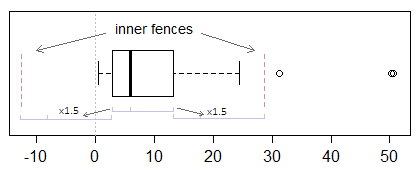
It is possible to have negative value for inner fence if your data is sufficiently right-skewed

In [ ]:
df['state'].value_counts().plot.bar(x='state', y=df['state'].value_counts())  #by sarah plot